In [26]:
import numpy as np
import time
import itertools
from pylab import *
from l2distance import l2distance
import numpy.random as random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from utils import *
from visualization import *
from analyze import *
from Buckets import *
from inverse_solver import *

pad1= [-1 -1  1 -1]
pad2= [ 1 -1  1  1]


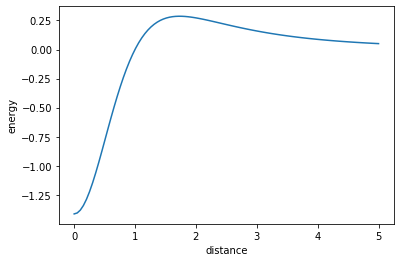

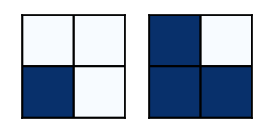

In [27]:
"""
calculate the potential energy surface between two perfectly aligned pads (i.e., no x or y displacement)

"""

"""
generate two pads by specifing the size of the pads, and the index the pads, here I choose size N=2, and idx to be 
2 and 11.
"""
N=2
pad1 = get_magnet_pad(N,2)
pad2 = get_magnet_pad(N,11)
print("pad1=",pad1)
print("pad2=",pad2)

"""
or you can manually specify the pads like this:
"""
#pad1 = np.array([-1,-1,-1,-1])
#pad2 = np.array([1,1,1,1])

"""
specify a list of distances 
"""
dlist = np.linspace(0.001,5.0,100) 

"""
calculate the interaction tensor
Tensor_list = [A1(d=d0), A2(d=d1), A3(d=d2),..., AK(d=dk)], where k = length of dlist

"""
Tensor_list = face_to_face_tensor(gen_2D_pos(N),dlist)


"""
calculate the potential energy surface as a function of distance.
the resulting pes is 
"""
pes = compute(pad1, Tensor_list, pad2)


"""
plot the pes and pads
"""
plt.plot(dlist, pes.reshape(-1)) 
plt.xlabel("distance")
plt.ylabel("energy")
show_pads(pad1, pad2,N)


/Users/yanyang/Research/Discrete-Magnet-System/visualization.py:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


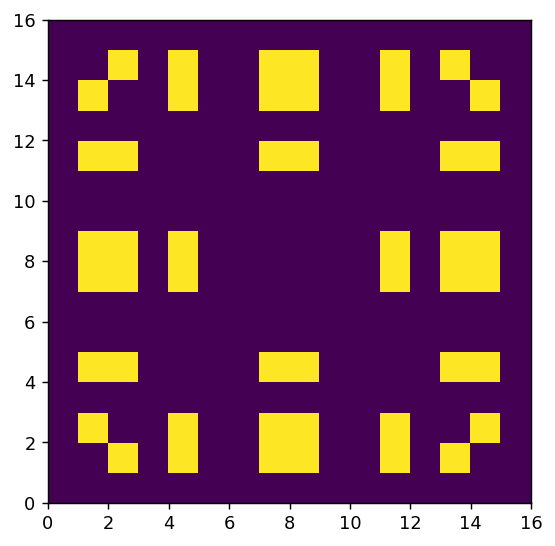

In [28]:
"""
calculate the pes for all combinations of 2 by 2 pads
"""
N=2
"""
generate a list of all conbinations of 2by2 pads
"""
pads_2by2 = gen_magnet_pads(N)


"""
generate distance list, contains 15 discrete points from 0.5 to 8.0
generate interaction tensors
"""
dlist = np.linspace(0.01,5.0,100) 
interaction_tensor_2D = gen_2D_pos(N)
interaction_tensor_3D = face_to_face_tensor(interaction_tensor_2D, dlist)

"""
calculate the pes
"""
pes_2by2 = computeAll(pads_2by2, interaction_tensor_3D)


"""
take the calculated pes, find the number of extremas in each pes

"""
extrema_2by2 = find_extrema(np.round(pes_2by2,10))
plot_extremas(extrema_2by2) 



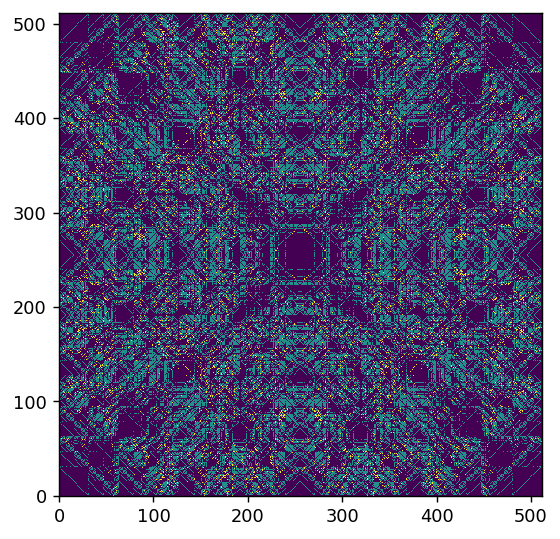

In [29]:
"""
calculate the pes for all combinations of 3by3 pads
"""
N=3
pads_3by3 = gen_magnet_pads(N)
dlist = np.arange(0.25,5,0.01)
interaction_tensor_2D = gen_2D_pos(N)
interaction_tensor_3D = face_to_face_tensor(interaction_tensor_2D, dlist)
pes_3by3 = computeAll(pads_3by3, interaction_tensor_3D)
extrema_3by3 = find_extrema(pes_3by3)
plot_extremas(extrema_3by3)

truth:
pad1= [-1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1  1 -1]
pad2= [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1]
err= 0.002095736621669421 iteration= 2
predicted:
pad1= [-1.  1. -1. -1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.]
pad2= [ 1.  1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1. -1.]


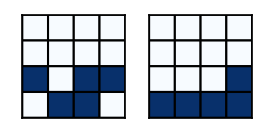

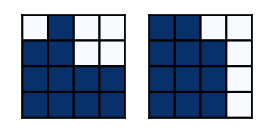

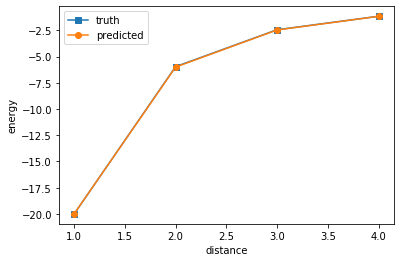

In [34]:
"""
The following examples shows how to solve the magnetic pad configuration given target interaction

"""

"""
first pre-define the size the pads, and the configuration of the pads 
"""
N=4
dlist=np.arange(1,5,1)
interaction_tensor_2D = gen_2D_pos(N)
interaction_tensor_3D = face_to_face_tensor(interaction_tensor_2D, dlist)
pad1 = get_magnet_pad(N,182)
pad2 = get_magnet_pad(N,31)
print("truth:")
print("pad1=",pad1)
print("pad2=",pad2)
show_pads(pad1, pad2, 4)
"""
Using the pre-defined pads, compute the ground truth interaction
"""
truth = compute(pad1,interaction_tensor_3D, pad2)


"""
using the ground truth interaction as input, solve for the pad configuration
"""
P,Q,err = opt(truth, N, interaction_tensor_3D, eps=0.001) 


"""
compute the predicted interaction using solved pad configuration.

"""
pred_pes = compute(P,interaction_tensor_3D, Q)

print("predicted:")
print("pad1=",P)
print("pad2=",Q)
show_pads(P, Q, 4)
plt.figure()
plt.plot(dlist, truth, label='truth',marker='s')
plt.plot(dlist, pred_pes, label='predicted',marker='o')
plt.xlabel("distance")
plt.ylabel("energy")
plt.legend()